In [129]:
import math
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

In [130]:
def import_and_clean_data(path):
    data = np.genfromtxt(path, delimiter='\t', skip_header=2, unpack=True)
    
    return np.array(data)

In [131]:
def plot(x, y, title="Plot", ylabel='y', xlabel='x', save = False, eksperimentell = False):

    f = plt.figure()
    f.clear()
    
    plot_style = 'o' if eksperimentell else '-'
    plt.plot(x, y, plot_style)
    #plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.grid()
    plt.draw()
    plt.show()
    
    if save:
        f.savefig(f"figures/{title.lower().replace(' ' , '_')}_eks.pdf", bbox_inches='tight')
    
    #f = plt.figure()
    #f.clear()
    #plt.plot(x, y, 'o')
    #plt.title(title)
    #plt.ylabel(ylabel)
    #plt.xlabel(xlabel)
    #plt.grid()
    #plt.draw()
    #plt.show()
    #if save:
    #    plt.savefig(f"figures/{title.lower().replace(' ', '_')}_eks.pdf", bbox_inches='tight')

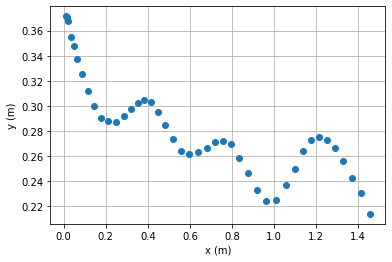

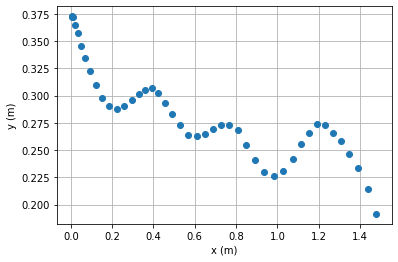

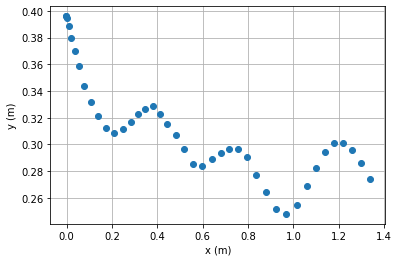

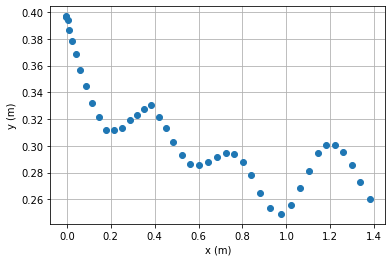

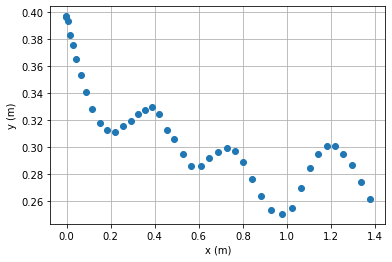

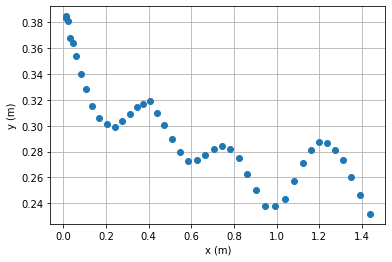

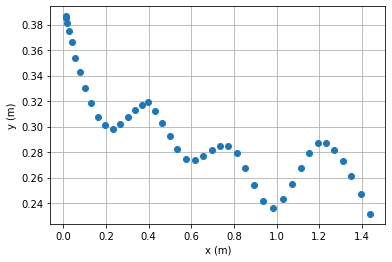

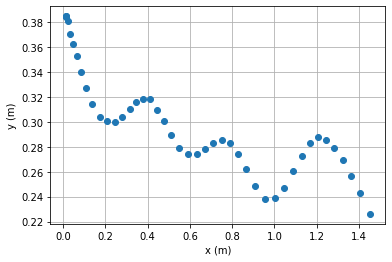

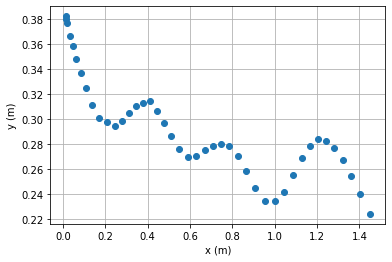

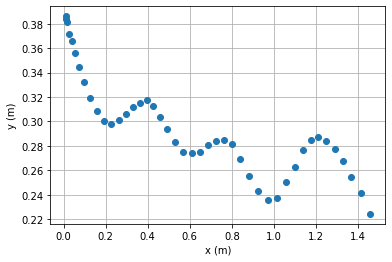

In [132]:
runs = []
for i in range(1, 11):
    runs.append(import_and_clean_data(f"txy_9_{i}.csv"))

for i, run in enumerate(runs):
    # Plots y distance over time
    # 0 is time, 1 is x, and 2 is y
    if i == 0:
        plot(run[1], run[2], title="Posisjon", xlabel="x (m)", ylabel="y (m)", save = True, eksperimentell=True)
    else:
        plot(run[1], run[2], title="Posisjon", xlabel="x (m)", ylabel="y (m)", eksperimentell=True)

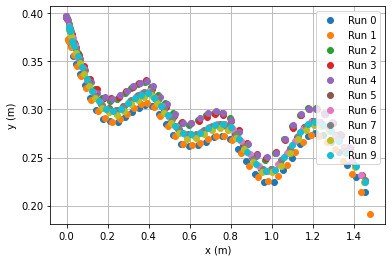

In [133]:
f = plt.figure()
f.clear()
for i, run in enumerate(runs):
    # Plots y distance over time
    # 0 is time, 1 is x, and 2 is y
    plt.plot(run[1], run[2], 'o', label=f"Run {i}")
#plt.title("Posisjon")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid()
plt.legend()
plt.savefig(f"figures/posisjoner_eks.pdf", bbox_inches='tight')

In [134]:
def get_speed(data):
    time = data[0]
    x_pos = data[1]
    y_pos = data[2]
    dt = time[1:] - time[:-1]
    dx = x_pos[1:] - x_pos[:-1]
    dy = y_pos[1:] - y_pos[:-1]
    vx = dx/dt
    vy = dy/dt

    speeds = np.sqrt(np.square(vx)+np.square(vy))
    return speeds


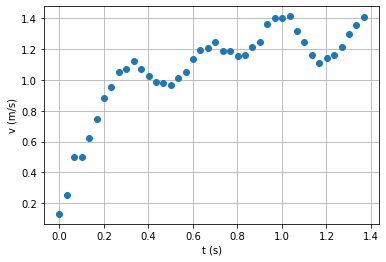

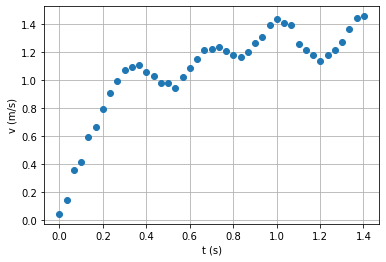

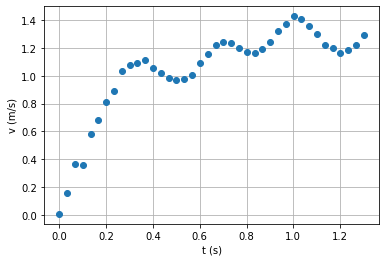

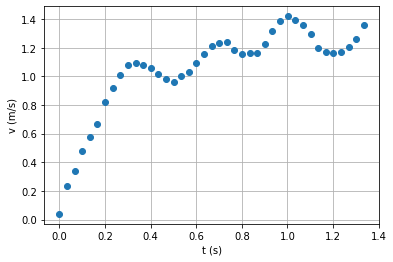

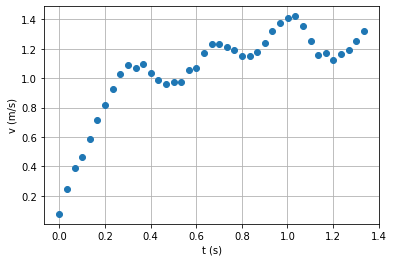

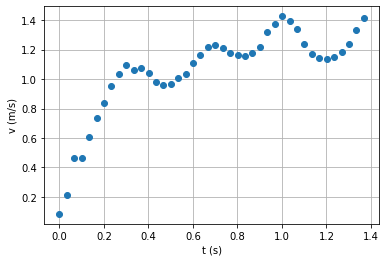

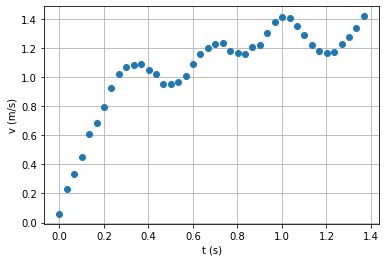

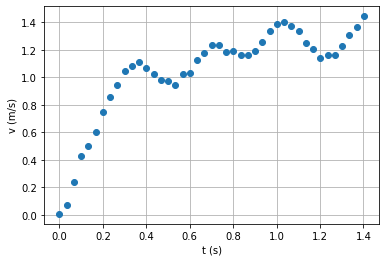

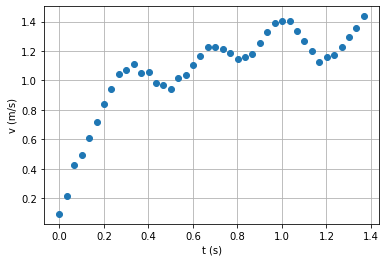

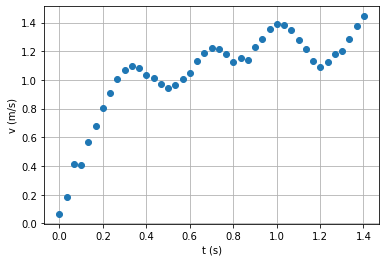

In [135]:

speeds = []
for i, run in enumerate(runs):
    speed = get_speed(run)
    speeds.append(speed)
    if i == 0:
        plot(run[0,:-1], speed, title='Hastighet over tid', xlabel="t (s)", ylabel="v (m/s)", save = True, eksperimentell=True)
    else:
        plot(run[0,:-1], speed, title='Hastighet over tid', xlabel="t (s)", ylabel="v (m/s)", eksperimentell=True)

#plot(data[1:,0], speeds[1:])

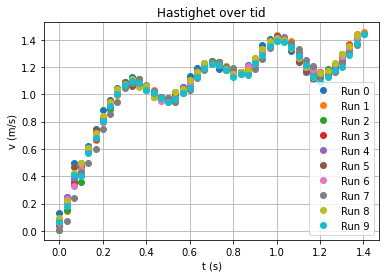

In [136]:
f = plt.figure()
f.clear()

for i, run in enumerate(runs):
    speed = get_speed(run)
    speeds.append(speed)
    #plot(run[0,:-1], speed, title='Hastighet over tid', xlabel="t (s)", ylabel="v (m/s)")
    # Plots y distance over time
    # 0 is time, 1 is x, and 2 is y
    plt.plot(run[0,:-1], speed, 'o', label=f"Run {i}")
plt.title("Hastighet over tid")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.grid()
plt.draw()
plt.legend()
plt.show()

f.savefig(f"figures/hastighet_over_tid_scatter_eks.pdf", bbox_inches='tight')


In [137]:
def uncertain_final_speed(speeds):
    final_speed = [speed[-1] for speed in speeds]
    average_final_speed = np.average(final_speed)
    standard_deviation = np.std(final_speed)
    standard_error = standard_deviation/np.sqrt(len(final_speed))
    return average_final_speed, standard_error

In [138]:
final_speed = uncertain_final_speed(speeds)
print(f"The final speed of the ball is {final_speed[0]}m/s +/- {final_speed[1]}m/s")

The final speed of the ball is 1.4003005118047898m/s +/- 0.011606166462200047m/s


1


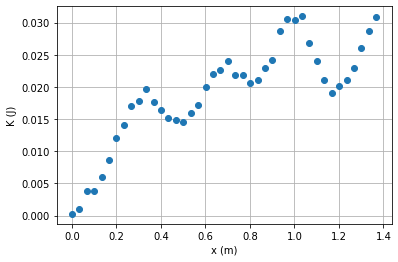

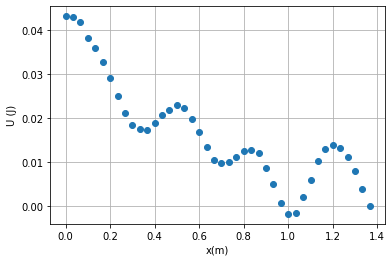

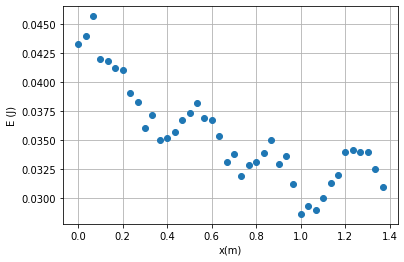

2


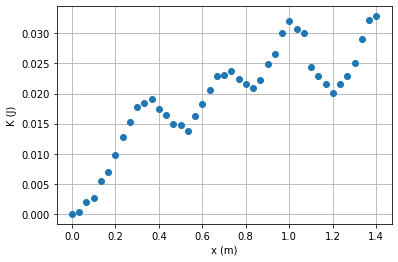

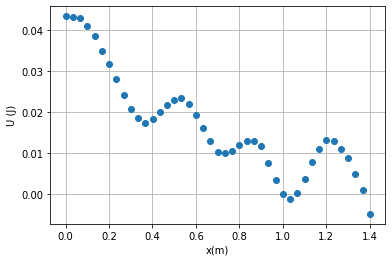

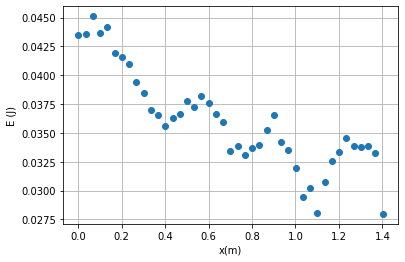

3


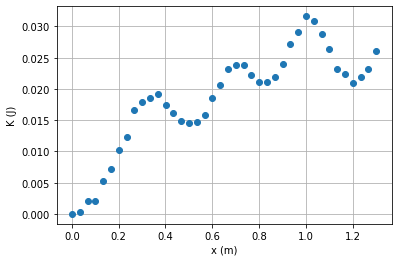

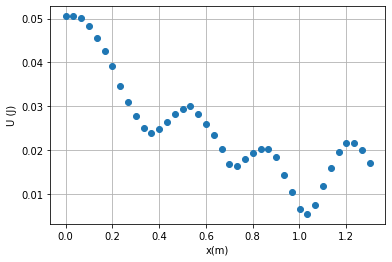

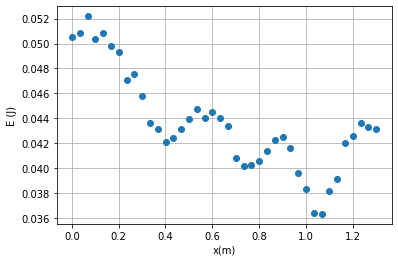

4


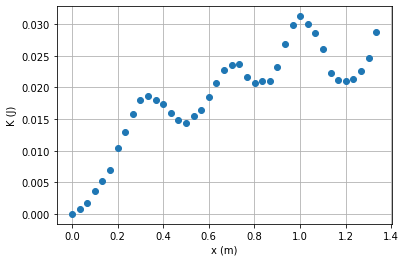

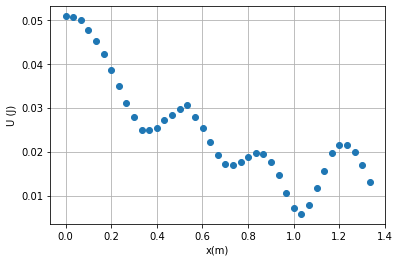

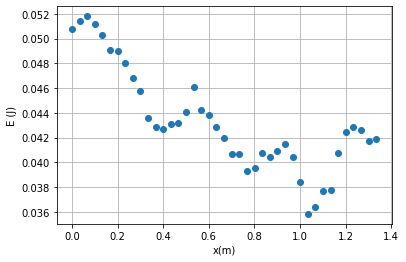

5


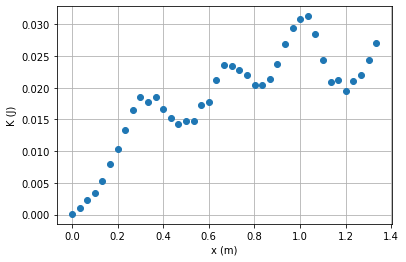

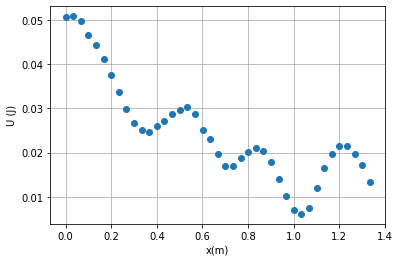

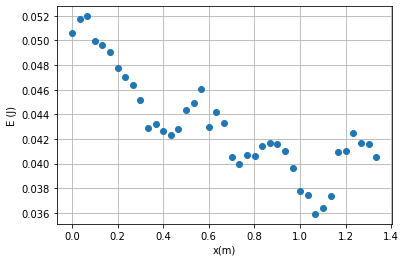

6


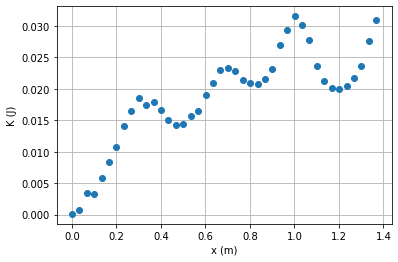

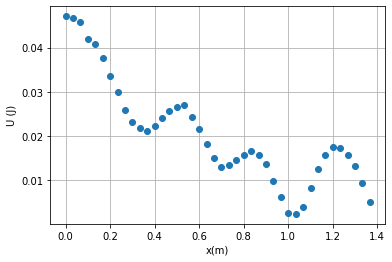

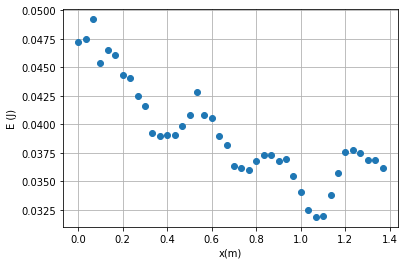

7


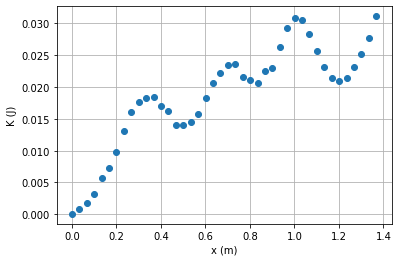

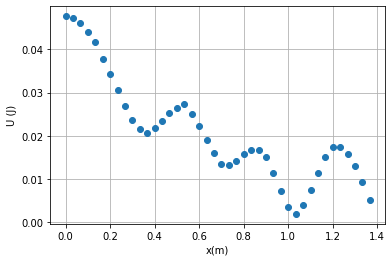

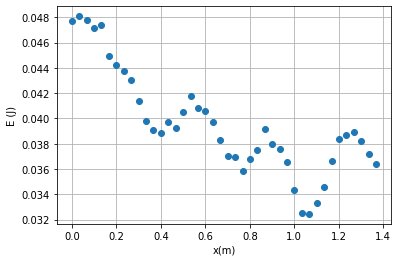

8


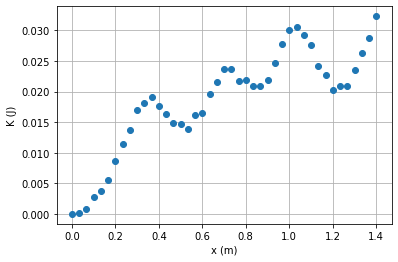

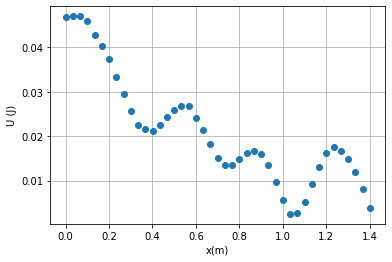

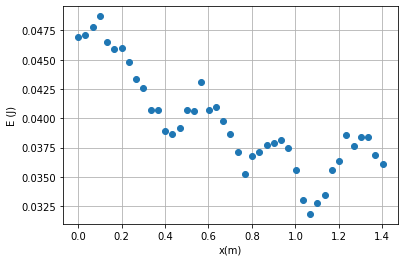

9


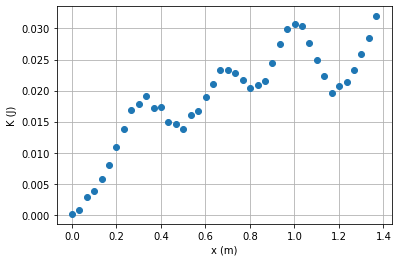

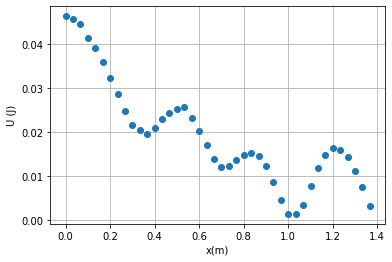

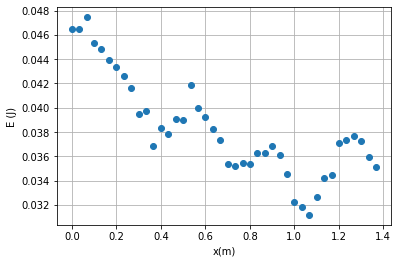

10


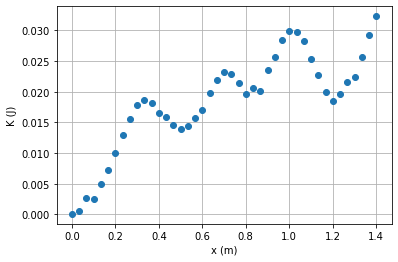

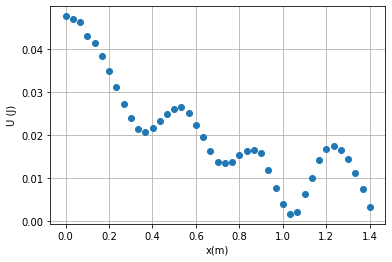

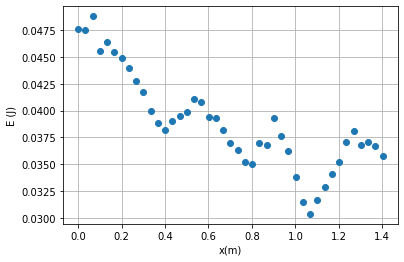

In [139]:

m = 0.031
g = 9.82
for i, run in enumerate(runs):
    #run = runs[2]
    print(i + 1)
    x = run[0,:-1]
    y = run[2,:-1]
    
    kinetic_energy = []
    
    for s in get_speed(run):
        kinetic_energy.append(m * s**2 / 2)
        
    
    potential_energy = []
    
    for h in y:
        potential_energy.append(m * g * (h - 0.23))
        
     
    if i == 0:
        plot(x, kinetic_energy, title="Kinetisk energi", xlabel="x (m)", ylabel="K (J)", save = True, eksperimentell=True)
        plot(x, potential_energy, title="Potensiell energi", xlabel="x(m)", ylabel="U (J)", save = True, eksperimentell=True)
        plot(x, np.array(potential_energy) + np.array(kinetic_energy), title="Total mekanisk energi", xlabel="x(m)", ylabel="E (J)", save = True, eksperimentell=True)
    else:
        plot(x, kinetic_energy, title="Kinetisk energi", xlabel="x (m)", ylabel="K (J)", eksperimentell=True)
        plot(x, potential_energy, title="Potensiell energi", xlabel="x(m)", ylabel="U (J)", eksperimentell=True)
        plot(x, np.array(potential_energy) + np.array(kinetic_energy), title="Total mekanisk energi", xlabel="x(m)", ylabel="E (J)", eksperimentell=True)
    

In [140]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

Horisontal avstand mellom festepunktene er 0.200 m:

In [141]:
h = 0.200
xfast=np.asarray([0,h,2*h,3*h,4*h,5*h,6*h,7*h])

Start, slutt og steglengde i x-rettning

In [142]:
xmin = 0.000
xmax = 1.401
dx = 0.001

Skriv inn y-verdiene til banens 8 festepunkter i tabellen yfast, basert på avlesing i tracker. Et vilkårlig eksempel:

In [143]:
yfast = np.asarray([0.361,0.277,0.293,0.251,0.257,0.214,0.260,0.216])

Programmet beregner deretter de 7 tredjegradspolynomene, et for hvert intervall mellom to nabofestepunkter. Med scipy.interpolate-funksjonen CubicSpline:

In [144]:
cs = CubicSpline(xfast, yfast, bc_type='natural')


Funksjonen cs kan nå brukes til å regne ut $y(x)$, $y'(x)$ og $y''(x)$ for en vilkårlig horisontal posisjon x, eventuelt for mange horisontale posisjoner lagret i en tabell: <br>
`cs(x)`   tilsvarer $y(x)$<br>
`cs(x,1)` tilsvarer $y'(x)$<br>
`cs(x,2)` tilsvarer $y''(x)$<br>

<br>
Her lager vi en tabell med x-verdier mellom 0 og 1.4 m

In [145]:
x = np.arange(xmin, xmax, dx) 

Funksjonen arange returnerer verdier på det "halvåpne" intervallet
`[xmin,xmax)`, dvs slik at xmin er med mens xmax ikke er med. Her blir
dermed `x[0]=xmin=0.000`, `x[1]=xmin+1*dx=0.001`, ..., `x[1400]=xmax-dx=1.400`, 
dvs x blir en tabell med 1401 elementer

In [146]:
Nx = len(x)
y = cs(x)       #y=tabell med 1401 verdier for y(x)
dy = cs(x,1)    #dy=tabell med 1401 verdier for y'(x)
d2y = cs(x,2)   #d2y=tabell med 1401 verdier for y''(x)

Eksempel: Plotter banens form y(x):

Denne koden kan nå utvides til å regne ut flere interessante størelser:

In [147]:
print(xfast, yfast)

def clamp(a, b, c = 0):
    # Can do in one line, but is it worth it?
    if a > c :
        return c
    if b > a :
        return b
    return a 

def get_yfast(y, xfast = xfast):
    y_fast = []
    for x in xfast:
        # Self explanitory ???
        idx = clamp(int(np.floor(x / 1.4 * (len(y)))), 0, len(y) - 1)
        y_fast.append(y[idx])
    return y_fast

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4] [0.361 0.277 0.293 0.251 0.257 0.214 0.26  0.216]


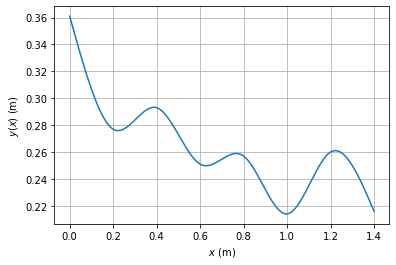

In [148]:
#f = plt.figure()
#f.clear()
#baneform = plt.figure('y(x)',figsize=(12,6))
#plt.plot(x,y,xfast,yfast,'*')
#plt.title('Banens form')
#plt.xlabel('$x$ (m)',fontsize=20)
#plt.ylabel('$y(x)$ (m)',fontsize=20)
#plt.ylim(0.10,0.40)
#plt.grid()
#plt.show()
#plt.figure('y(x)',figsize=(12,6))
#
#plt.savefig(f"figures/baneform_num.pdf", bbox_inches='tight')

plot(x, y, "Banens form", '$y(x)$ (m)', '$x$ (m)', True) 

In [149]:
m = 0.031 #kilogram
r = 0.011 #meter
g = 9.82 #meter per sekund ** 2 
c = 2/5 #massefordelingskonstant
y_0 = cs(0)
x_0 = 0

In [150]:
def speed(x):
    return np.sqrt(2*g*(y_0-cs(x))/1+c)

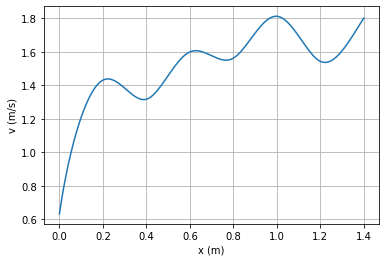

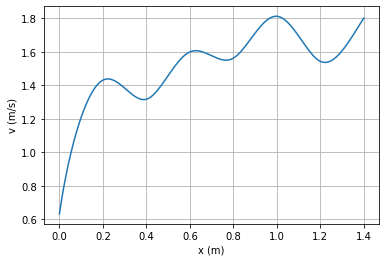

In [151]:
v = speed(x)
plot(x, v, 'Hastighet', 'v (m/s)', 'x (m)')
plot(x, v, 'Hastighet', 'v (m/s)', 'x (m)', False)

In [152]:
beta = np.arctan(dy)

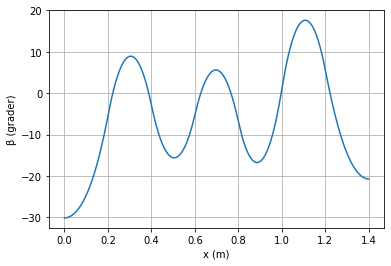

In [153]:
plot(x, np.rad2deg(beta), 'Helningsvinkel', 'β (grader)', 'x (m)')

In [154]:
k = d2y/(1+dy**2)**(3/2)

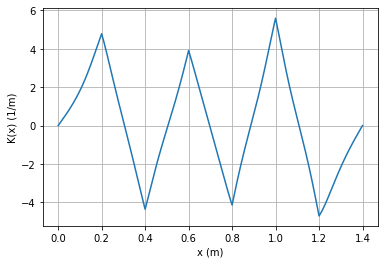

In [155]:
plot(x, k, "Krumning", 'K(x) (1/m)', 'x (m)')

In [156]:
# Sentripetalakselerasjon
a_s = v**2 * k

In [157]:
N = m * (g*np.cos(beta) + a_s)

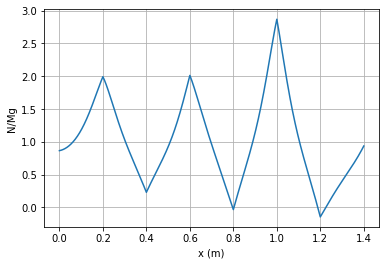

In [158]:
plot(x, N/(m*g), 'Normalisert normalkraft', 'N/Mg', 'x (m)')

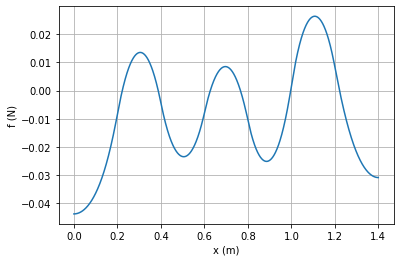

In [159]:
frik = (c*m*g*np.sin(beta))/(1+c)

plot(x, frik, 'Friksjonskraft', 'f (N)', 'x (m)')

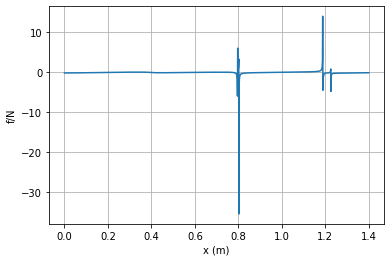

In [160]:

plot(x, frik/N, 'Forhold mellom friksjonskraft og normalkraft', 'f/N', 'x (m)')

In [161]:
v_0 = 0
v_x = v * np.cos(beta) 
dx = x[1:]-x[:-1]

In [162]:
dv_x = 0.5 * (v_x[:-1] + v_x[1:])
dt = dx/dv_x

# dt og slikt
sum_dt = np.sum(dt)

t = np.cumsum([0, *dt])

In [163]:
plot(t, x, title="Horisontal posisjon over tid", xlabel="t (s)", ylabel="x(m)", fast=False)

TypeError: plot() got an unexpected keyword argument 'fast'

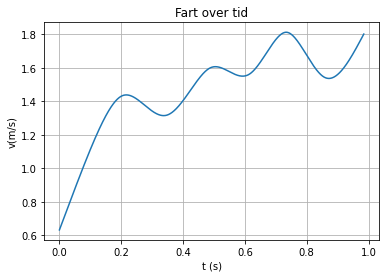

In [126]:
plot(t, v, title="Fart over tid", xlabel="t (s)", ylabel="v(m/s)", fast=False)

[0.361      0.36041856 0.35983715 ... 0.21675806 0.21637904 0.216     ]


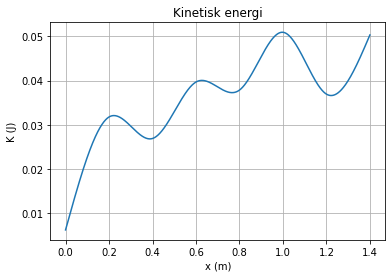

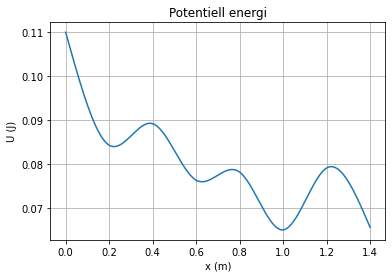

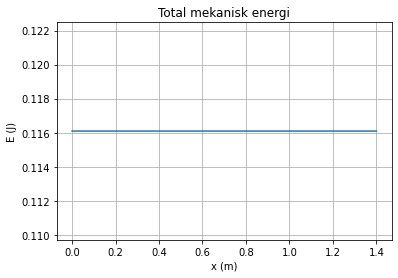

In [127]:
#Total kinetisk energi, eventuelt energitap

kinetic_energy = []

print(y)
for s in v:
    kinetic_energy.append(m * s**2 / 2)
    
plot(x, kinetic_energy, title="Kinetisk energi", xlabel="x (m)", ylabel="K (J)")

potential_energy = []

for h in y:
    potential_energy.append(m * g * (h - 0.0))
    
 
plot(x, potential_energy, title="Potentiell energi", xlabel="x (m)", ylabel="U (J)")

plot(x, np.array(potential_energy) + np.array(kinetic_energy), title="Total mekanisk energi", xlabel="x (m)", ylabel="E (J)")

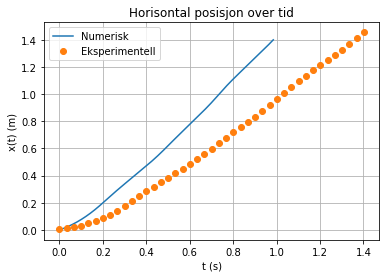

In [128]:
plot_run = runs[0]

f = plt.figure()
f.clear()

plt.plot(t, x, label="Numerisk")
plt.plot(plot_run[0], plot_run[1], 'o', label="Eksperimentell")
plt.title("Horisontal posisjon over tid")
plt.xlabel("t (s)")
plt.ylabel("x(t) (m)")
plt.grid()
plt.draw()
plt.legend()
plt.show()

f.savefig(f"figures/horisontal_posisjon_over_tid.pdf", bbox_inches='tight')